# MoviesLens data set
# Question: How do men and women rate the same movie?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Read three data files

In [2]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv('u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# u.item has a large number of fields.  Lets use only two.
# Note the use of 'usecols'

m_cols = ['movie_id', 'title']
movies = pd.read_csv('u.item', sep='|', names=m_cols, usecols=range(2),
                     encoding='latin-1')

In [3]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
# create one merged DataFrame
movie_ratings = pd.merge(users, ratings,
                         how='inner',
                        left_on='user_id',
                        right_on='user_id')
data = pd.merge(movie_ratings, movies,
               how='inner',
               on='movie_id')

,user_id,age,gender,occupation,zip_code,movie_id,rating,unix_timestamp,title
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994)
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994)
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994)
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994)
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994)


Always good to start off by examining the data

In [6]:
data.head()

,user_id,age,gender,occupation,zip_code,movie_id,rating,unix_timestamp,title
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994)
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994)
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994)
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994)
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994)


### [Q] What are the top 10 movies that have the most number of ratings?

#### Approach 1: 
- Form groups based on title
- find the size of each group
- sort the resultant Series with .sort_values

In [9]:
data.groupby('title').size().sort_values(ascending=False)




title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Brother's Kiss, A (1997)                1
Object of My Affection, The (1998)      1
Office Killer (1997)                    1
Other Voices, Other Rooms (1997)        1
Lady of Burlesque (1943)                1
Length: 1664, dtype: int64

#### Approach 2:  Use Pandas' .value_counts :-)

In [8]:
data.title.value_counts()



Star Wars (1977)                               583
Contact (1997)                                 509
Fargo (1996)                                   508
Return of the Jedi (1983)                      507
Liar Liar (1997)                               485
                                              ... 
Hana-bi (1997)                                   1
You So Crazy (1994)                              1
All Things Fair (1996)                           1
Land and Freedom (Tierra y libertad) (1995)      1
Sweet Nothing (1995)                             1
Name: title, Length: 1664, dtype: int64

### [Q] What is the average rating for each movie?  Which movies are rated the highest? 

In [13]:
d1 = data.groupby('title').rating.mean().sort_values(ascending=False)
d1

title
They Made Me a Criminal (1939)                       5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Prefontaine (1997)                                   5.0
Someone Else's America (1995)                        5.0
Aiqing wansui (1994)                                 5.0
                                                    ... 
Quartier Mozart (1992)                               1.0
Baton Rouge (1988)                                   1.0
Further Gesture, A (1996)                            1.0
Somebody to Love (1994)                              1.0
Good Morning (1971)                                  1.0
Name: rating, Length: 1664, dtype: float64

### [Q] Perform the same calculation, but this time only for movies that have been rated at least 100 times

In [21]:
s1 = data.groupby('title').apply(lambda df: (df.rating.mean(), df.size))

s2 = s1[s1.apply(lambda v: v[1] > 100)]
s2.sort_values(ascending=False)

title
Close Shave, A (1995)                                     (4.491071428571429, 1008)
Schindler's List (1993)                                   (4.466442953020135, 2682)
Wrong Trousers, The (1993)                                (4.466101694915254, 1062)
Casablanca (1942)                                          (4.45679012345679, 2187)
Wallace & Gromit: The Best of Aardman Animation (1996)     (4.447761194029851, 603)
                                                                    ...            
Free Willy 3: The Rescue (1997)                           (1.7407407407407407, 243)
Lawnmower Man 2: Beyond Cyberspace (1996)                 (1.7142857142857142, 189)
Amityville II: The Possession (1982)                      (1.6428571428571428, 126)
Body Parts (1991)                                         (1.6153846153846154, 117)
Children of the Corn: The Gathering (1996)                (1.3157894736842106, 171)
Length: 1091, dtype: object

### Determine the 50 movies that have been reviewed the most
(we've already done it)

In [24]:
most_50 = data.title.value_counts().head(50)
most_50




Star Wars (1977)                                583
Contact (1997)                                  509
Fargo (1996)                                    508
Return of the Jedi (1983)                       507
Liar Liar (1997)                                485
English Patient, The (1996)                     481
Scream (1996)                                   478
Toy Story (1995)                                452
Air Force One (1997)                            431
Independence Day (ID4) (1996)                   429
Raiders of the Lost Ark (1981)                  420
Godfather, The (1972)                           413
Pulp Fiction (1994)                             394
Twelve Monkeys (1995)                           392
Silence of the Lambs, The (1991)                390
Jerry Maguire (1996)                            384
Chasing Amy (1997)                              379
Rock, The (1996)                                378
Empire Strikes Back, The (1980)                 367
Star Trek: F

## Pivot Tables

In [27]:
data.head(0)

,user_id,age,gender,occupation,zip_code,movie_id,rating,unix_timestamp,title


In [25]:
len(data['title'].value_counts())

1664

In [26]:
len(data)

100000

In [29]:
pvt = data.pivot_table(index='title',
                      columns='gender',
                      values='rating',
                      aggfunc= lambda x: x.mean())

pvt.head()



gender,F,M
title,,
'Til There Was You (1997),2.200000,2.500000
1-900 (1994),1.000000,3.000000
101 Dalmatians (1996),3.116279,2.772727
12 Angry Men (1957),4.269231,4.363636
187 (1997),3.500000,2.870968


In [30]:
len(pvt)

1664

### Find X to plot the difference in average reviews between men and women

In [31]:
most_50.index

Index(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)',
       'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)',
       'Air Force One (1997)', 'Independence Day (ID4) (1996)',
       'Raiders of the Lost Ark (1981)', 'Godfather, The (1972)',
       'Pulp Fiction (1994)', 'Twelve Monkeys (1995)',
       'Silence of the Lambs, The (1991)', 'Jerry Maguire (1996)',
       'Chasing Amy (1997)', 'Rock, The (1996)',
       'Empire Strikes Back, The (1980)', 'Star Trek: First Contact (1996)',
       'Titanic (1997)', 'Back to the Future (1985)',
       'Mission: Impossible (1996)', 'Fugitive, The (1993)',
       'Indiana Jones and the Last Crusade (1989)',
       'Willy Wonka and the Chocolate Factory (1971)',
       'Princess Bride, The (1987)', 'Forrest Gump (1994)',
       'Monty Python and the Holy Grail (1974)', 'Saint, The (1997)',
       'Full Monty, The (1997)', 'Men in Black (1997)',
       'Terminator, Th

In [42]:
pvt['diff'] = pvt.F-pvt.M
pvt.head()


X = pvt['diff']
X = X.loc[most_50.index]

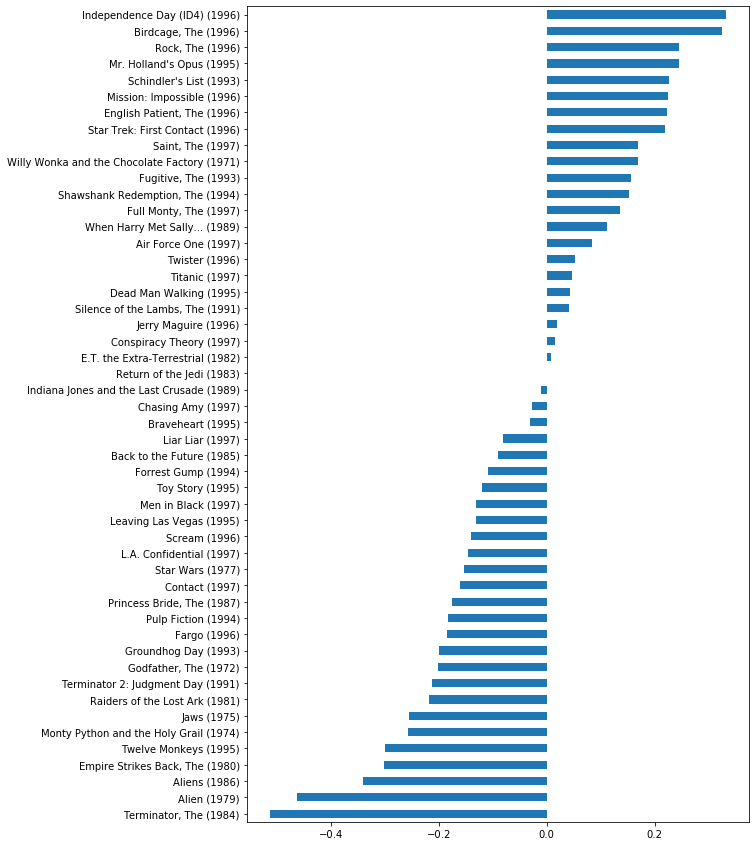

In [43]:
X.sort_values().plot(kind='barh',figsize=[9,15])